In [25]:
# Import Python Package
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [26]:
# Load dataset using pandas read_csv function

# 1st Dataset
# Source: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
df1 = pd.read_csv("healthcare-dataset-stroke-data.csv")
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [27]:
# Drop id column which has not significant effect in predictions model
df1 = df1.drop(["id"], axis=1)
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [28]:
# Get information about dataframe about dtype and count of items
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [29]:
# Handle missing values in bmi coloum
df1["bmi"] = df1["bmi"].fillna(df1.groupby(["age"])["bmi"].transform("mean"))
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [30]:
# converting 'age' from float to int
df1['age'] = df1['age'].astype(int)

In [31]:
# Rename respective columns names
rename_col = {
    "gender": "Gender",
    "age": "Age",
    "hypertension": "Hypertension",
    "heart_disease": "HeartDisease",
    "ever_married": "EverMarried",
    "work_type": "WorkType",
    "Residence_type": "ResidenceType",
    "avg_glucose_level": "AvgGulcoseLevel",
    "bmi": "BMI",
    "smoking_status": "SmokingStatus",
    "stroke": "Stroke",
}
df1.rename(columns=rename_col, inplace=True)
df1.head()

,Gender,Age,Hypertension,HeartDisease,EverMarried,WorkType,ResidenceType,AvgGulcoseLevel,BMI,SmokingStatus,Stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,30.19,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


In [32]:
# Load dataset using pandas read_csv function

# Data Source: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
df2 = pd.read_csv("heart.csv")

# Rename column names
df2.rename(columns={"Sex": "Gender"}, inplace=True)
df2.head()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [33]:
# Replace value of M and F of sex in male and female
df2["Gender"] = df2["Gender"].replace(["M", "F"], ["Male", "Female"])
df2

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,Male,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,Female,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,Male,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,Female,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,Male,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,Male,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,Male,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,Male,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,Female,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [34]:
# Get information about dataframe about dtype and count of items
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Gender          918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [35]:
# merge the two dataframes based on a common column
df = pd.merge(df1, df2, on=["Gender", "Age", "HeartDisease"])

# remove any duplicate rows from the merged dataframe
df.drop_duplicates(inplace=True)
df.head()

,Gender,Age,Hypertension,HeartDisease,EverMarried,WorkType,ResidenceType,AvgGulcoseLevel,BMI,SmokingStatus,Stroke,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,TA,145,0,0,LVH,125,N,0.0,Flat
1,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,TA,142,270,1,Normal,125,N,2.5,Up
2,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,ASY,160,384,1,ST,130,Y,0.0,Flat
3,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,ASY,120,0,1,Normal,150,N,1.5,Down
4,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,ASY,146,369,0,Normal,110,Y,1.9,Flat


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15155 entries, 0 to 15154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           15155 non-null  object 
 1   Age              15155 non-null  int64  
 2   Hypertension     15155 non-null  int64  
 3   HeartDisease     15155 non-null  int64  
 4   EverMarried      15155 non-null  object 
 5   WorkType         15155 non-null  object 
 6   ResidenceType    15155 non-null  object 
 7   AvgGulcoseLevel  15155 non-null  float64
 8   BMI              15155 non-null  float64
 9   SmokingStatus    15155 non-null  object 
 10  Stroke           15155 non-null  int64  
 11  ChestPainType    15155 non-null  object 
 12  RestingBP        15155 non-null  int64  
 13  Cholesterol      15155 non-null  int64  
 14  FastingBS        15155 non-null  int64  
 15  RestingECG       15155 non-null  object 
 16  MaxHR            15155 non-null  int64  
 17  ExerciseAngi

In [37]:
from sklearn.preprocessing import LabelEncoder

# create an instance of label encoder
le = LabelEncoder()

# encode the categorical variable
df["Gender"] = le.fit_transform(df["Gender"])
df["EverMarried"] = le.fit_transform(df["EverMarried"])
df["WorkType"] = le.fit_transform(df["WorkType"])
df["ResidenceType"] = le.fit_transform(df["ResidenceType"])
df["SmokingStatus"] = le.fit_transform(df["SmokingStatus"])
df["ChestPainType"] = le.fit_transform(df["ChestPainType"])
df["RestingECG"] = le.fit_transform(df["RestingECG"])
df["ExerciseAngina"] = le.fit_transform(df["ExerciseAngina"])
df["ST_Slope"] = le.fit_transform(df["ST_Slope"])

Stroke             1.000000
HeartDisease       0.180407
Age                0.177645
AvgGulcoseLevel    0.137140
Oldpeak            0.105917
ExerciseAngina     0.086091
FastingBS          0.067169
RestingBP          0.051226
Gender             0.050989
Hypertension       0.042093
BMI                0.030880
ResidenceType      0.029458
EverMarried        0.015054
SmokingStatus      0.014171
WorkType          -0.003186
RestingECG        -0.006269
ChestPainType     -0.040084
Cholesterol       -0.045973
MaxHR             -0.089795
ST_Slope          -0.092768
Name: Stroke, dtype: float64


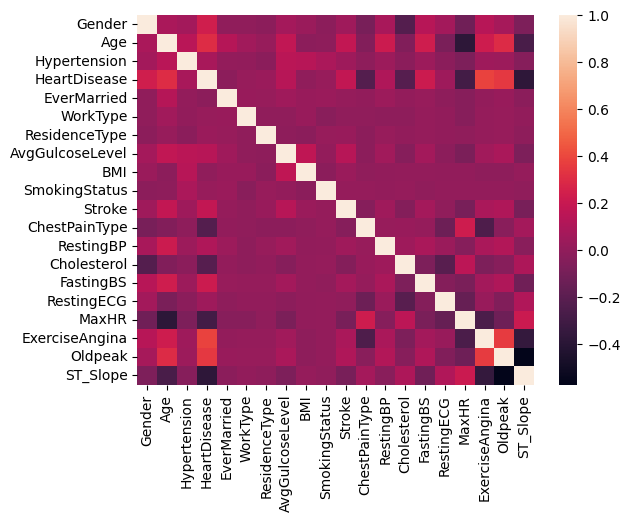

In [38]:
# Visual correlations between all features in graphical representation
sns.heatmap(df.corr())
corr1 = df.corr()
print(corr1["Stroke"].sort_values(ascending=False))

In [39]:
# Select input attributes for our model
X = df[["Age", "HeartDisease", "AvgGulcoseLevel"]]
X.head()

,Age,HeartDisease,AvgGulcoseLevel
0,67,1,228.69
1,67,1,228.69
2,67,1,228.69
3,67,1,228.69
4,67,1,228.69


In [40]:
# Create output attribute for our model
y = df["Stroke"]
y

0        1
1        1
2        1
3        1
4        1
        ..
15150    0
15151    0
15152    0
15153    0
15154    0
Name: Stroke, Length: 15155, dtype: int64

In [41]:
# Feature scaling
# Formula standarscaler = (x - mean of x)/ stander deviation of x

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 1.76934761,  3.09804811,  2.45022633],
       [ 1.76934761,  3.09804811,  2.45022633],
       [ 1.76934761,  3.09804811,  2.45022633],
       ...,
       [-0.82489819,  3.09804811, -0.32256442],
       [-0.82489819,  3.09804811, -0.32256442],
       [-0.82489819,  3.09804811, -0.32256442]])

In [42]:
# split the dataset into test and train
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the training data into training and cross-validation sets
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

In [46]:
# Create an instance of the LogisticRegression class
clf = LogisticRegression(C=0.001,max_iter=1000)

# Train the model
clf.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [4546, 4547]

In [47]:
# Evaluate the model on the testing data
y_pred = clf.predict(X_cv)
y_pred
print(type(y_pred))
print(y_pred.shape)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [45]:
from sklearn.metrics import mean_squared_error

# y_test is the actual values, y_pred is the predicted values
mse = 1-mean_squared_error(y_test, y_pred)
print(mse*100)

94.37479379742659
